## Install Dependancies

In [ ]:
!pip install Arabic-Stopwords
!pip install emoji
!pip install Tashaphyne
!pip install qalsadi
!pip install np_utils

## Modules Required 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from tashaphyne.stemming import ArabicLightStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.layers import Reshape,Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
import tensorflow as tf
import keras.backend as K
from keras.utils import np_utils
import re
import emoji
from nltk.corpus import stopwords
init_notebook_mode(connected=True)
from sklearn.feature_extraction.text import TfidfVectorizer
import qalsadi.lemmatizer
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to C:\Users\abanoub
[nltk_data]     samir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
dataFrame = pd.read_excel("original_dataset.xlsx")

In [4]:
dataFrame

Unnamed: 0                                 review_description  rating  \
0               0                         ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ      -1   
1               1                                  ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ      -1   
2               2                                 ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ      -1   
3               3  ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...      -1   
4               4                     ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠      -1   
...           ...                                                ...     ...   
67122       67122  ŸÉÿ™ÿßÿ® ÿ¨ŸäÿØ Ÿàÿ•ŸÜ ŸÉÿßŸÜ ŸÖŸÖŸÑÿß ÿ®ÿπÿ∂ ÿßŸÑÿ¥Ÿäÿ° ÿπŸÜÿØ ŸÖŸÜÿ™ÿµŸÅ ÿßŸÑŸÉÿ™...       0   
67123       67123  ÿ£ŸàŸÑ ÿ™ÿ¨ÿ±ÿ®ÿ© ŸÖÿπ ÿßŸÑÿÆŸäÿßŸÑ ÿßŸÑÿπŸÑŸÖŸä...ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖ...       0   
67124       67124  ŸÖÿ±ÿ∂Ÿä. ÿßŸÑÿßŸÅÿ∑ÿßÿ± ŸÑÿ∞Ÿäÿ∞. ŸÑÿß ŸäŸàÿ¨ÿØ ŸÇÿßÿ¶ŸÖÿ© ÿ∑ÿπÿßŸÖ ŸÅŸä ÿßŸÑÿ∫ÿ±...       0   
67125       67125  ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ ÿ®ŸäŸÜ Ÿàÿßÿ¶ŸÑ Ÿà ÿ¥ŸàŸÇ ŸÉÿßŸÜÿ™ ÿ£ÿ¨ŸÖŸÑ ŸÖÿßŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ©....       0   
67126       67126  ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸàÿπÿØŸÖ ÿßŸÑÿßÿ≥ÿ™ÿπÿØÿßÿØ ŸÑŸÑŸÜÿ≤ŸÑÿßÿ° . ŸÑÿß ÿ¥Ÿä...       0   

           company  
0      alahli_bank  
1      alahli_bank  
2      alahli_bank  
3      alahli_bank  
4      alahli_bank  
...            ...  
67122       hotels  
67123       hotels  
67124       hotels  
67125       hotels  
67126       hotels  

[67127 rows x 4 columns]

In [5]:
dataFrame.drop(columns=['Unnamed: 0'],inplace=True)

## Clean Data

In [6]:
dataFrame.review_description.duplicated().sum()

139

In [7]:
dataFrame.drop(dataFrame[dataFrame.review_description.duplicated() == True].index, axis = 0, inplace = True)

In [8]:
dataFrame.reset_index(drop=True)

review_description  rating      company
0                             ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ      -1  alahli_bank
1                                      ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ      -1  alahli_bank
2                                     ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ      -1  alahli_bank
3      ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...      -1  alahli_bank
4                         ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠      -1  alahli_bank
...                                                  ...     ...          ...
66983  ŸÉÿ™ÿßÿ® ÿ¨ŸäÿØ Ÿàÿ•ŸÜ ŸÉÿßŸÜ ŸÖŸÖŸÑÿß ÿ®ÿπÿ∂ ÿßŸÑÿ¥Ÿäÿ° ÿπŸÜÿØ ŸÖŸÜÿ™ÿµŸÅ ÿßŸÑŸÉÿ™...       0       hotels
66984  ÿ£ŸàŸÑ ÿ™ÿ¨ÿ±ÿ®ÿ© ŸÖÿπ ÿßŸÑÿÆŸäÿßŸÑ ÿßŸÑÿπŸÑŸÖŸä...ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖ...       0       hotels
66985  ŸÖÿ±ÿ∂Ÿä. ÿßŸÑÿßŸÅÿ∑ÿßÿ± ŸÑÿ∞Ÿäÿ∞. ŸÑÿß ŸäŸàÿ¨ÿØ ŸÇÿßÿ¶ŸÖÿ© ÿ∑ÿπÿßŸÖ ŸÅŸä ÿßŸÑÿ∫ÿ±...       0       hotels
66986  ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ ÿ®ŸäŸÜ Ÿàÿßÿ¶ŸÑ Ÿà ÿ¥ŸàŸÇ ŸÉÿßŸÜÿ™ ÿ£ÿ¨ŸÖŸÑ ŸÖÿßŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ©....       0       hotels
66987  ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸàÿπÿØŸÖ ÿßŸÑÿßÿ≥ÿ™ÿπÿØÿßÿØ ŸÑŸÑŸÜÿ≤ŸÑÿßÿ° . ŸÑÿß ÿ¥Ÿä...       0       hotels

[66988 rows x 3 columns]

In [9]:
dataFrame.review_description.duplicated().sum()

0

In [10]:
dataFrame.review_description.duplicated().isnull().sum()

0

# EDA

## Let's take a look on the ratings distribution in the data

In [11]:
fig = go.Figure(data=[go.Pie(labels=["postive","negative","neutral"],values=[dataFrame.rating[dataFrame.rating==x].count() for x in dataFrame.rating.unique()],pull=[0, 0.1, 0])])
fig.update_layout(title='Ratings')
iplot(fig)

## Conculsion
### **The major is Postive and Negative while the precentage of the neutral is small**

## What the heights company feedbacks in the data?

In [12]:
fig=go.Figure(data=[go.Pie(labels=dataFrame.company.unique(),values=dataFrame.company.value_counts(),hole=0.5)])
iplot(fig)
fig.show()

## Conculsion
### **The highest company feedback in the data is Al Ahly bank  then talbalt**

## Lets show the companies vs their feedbacks

In [13]:
dataFrame2=dataFrame.copy()
dataFrame2.rating=dataFrame.rating.map({0:"neutral",1:"postive",-1:"negative"})

In [14]:
fig=px.sunburst(dataFrame2,path=["company","rating"],title="Companies and Feedbacks", color_continuous_scale='RdBu',color="rating")
fig.update_traces(textinfo='label + percent parent')
fig.show()

## lets takes a look for every company ratings distrbutions

In [15]:
for companyName in dataFrame.company.unique():
    fig = go.Figure(data=[go.Bar(y=dataFrame.rating[dataFrame["company"]==companyName].value_counts(),x=dataFrame.rating[dataFrame["company"]==companyName].unique())])
    fig.update_layout(title=companyName+' Ratings')
    iplot(fig)

# Text Preprocessing

## Remove StopWords

In [16]:
stopWords=list(set(stopwords.words("arabic")))## To remove duplictes and return to list again 
#Some words needed to work with to will remove 
for word in ['ŸàÿßŸà','ŸÑÿß','ŸÑŸÉŸÜ','ŸàŸÑŸÉŸÜ','ÿ£ÿ∑ÿπŸÖ', 'ÿ£ŸÅ','ŸÑŸäÿ≥','ŸàŸÑÿß','ŸÖÿß']:
    stopWords.remove(word)

In [17]:
len(stopWords)

692

### Lets see example how will apply effect the reviews

In [18]:
dataFrame.review_description

0                               ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ
1                                        ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ
2                                       ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ
3        ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...
4                           ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠
                               ...                        
67122    ŸÉÿ™ÿßÿ® ÿ¨ŸäÿØ Ÿàÿ•ŸÜ ŸÉÿßŸÜ ŸÖŸÖŸÑÿß ÿ®ÿπÿ∂ ÿßŸÑÿ¥Ÿäÿ° ÿπŸÜÿØ ŸÖŸÜÿ™ÿµŸÅ ÿßŸÑŸÉÿ™...
67123    ÿ£ŸàŸÑ ÿ™ÿ¨ÿ±ÿ®ÿ© ŸÖÿπ ÿßŸÑÿÆŸäÿßŸÑ ÿßŸÑÿπŸÑŸÖŸä...ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖ...
67124    ŸÖÿ±ÿ∂Ÿä. ÿßŸÑÿßŸÅÿ∑ÿßÿ± ŸÑÿ∞Ÿäÿ∞. ŸÑÿß ŸäŸàÿ¨ÿØ ŸÇÿßÿ¶ŸÖÿ© ÿ∑ÿπÿßŸÖ ŸÅŸä ÿßŸÑÿ∫ÿ±...
67125    ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ ÿ®ŸäŸÜ Ÿàÿßÿ¶ŸÑ Ÿà ÿ¥ŸàŸÇ ŸÉÿßŸÜÿ™ ÿ£ÿ¨ŸÖŸÑ ŸÖÿßŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ©....
67126    ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸàÿπÿØŸÖ ÿßŸÑÿßÿ≥ÿ™ÿπÿØÿßÿØ ŸÑŸÑŸÜÿ≤ŸÑÿßÿ° . ŸÑÿß ÿ¥Ÿä...
Name: review_description, Length: 66988, dtype: obj

In [19]:
" ".join([word for word in dataFrame.review_description[9].split() if word not in stopWords])

'ÿµÿ±ÿßÿ≠Ÿá ÿ¥Ÿä ŸÖŸàÿ≥ŸÅ'

## Handle Emojies

In [20]:
emojis = {
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "üòÇ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üíî":"ŸÇŸÑÿ® ÿ≠ÿ≤ŸäŸÜ",
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "‚ù§Ô∏è":"ÿ≠ÿ®",
    "‚ù§":"ÿ≠ÿ®",
    "üòç":"ÿ≠ÿ®",
    "üò≠":"Ÿäÿ®ŸÉŸä",
    "üò¢":"ÿ≠ÿ≤ŸÜ",
    "üòî":"ÿ≠ÿ≤ŸÜ",
    "‚ô•":"ÿ≠ÿ®",
    "üíú":"ÿ≠ÿ®",
    "üòÖ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üôÅ":"ÿ≠ÿ≤ŸäŸÜ",
    "üíï":"ÿ≠ÿ®",
    "üíô":"ÿ≠ÿ®",
    "üòû":"ÿ≠ÿ≤ŸäŸÜ",
    "üòä":"ÿ≥ÿπÿßÿØÿ©",
    "üëè":"ŸäÿµŸÅŸÇ",
    "üëå":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "üò¥":"ŸäŸÜÿßŸÖ",
    "üòÄ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòå":"ÿ≠ÿ≤ŸäŸÜ",
    "üåπ":"Ÿàÿ±ÿØÿ©",
    "üôà":"ÿ≠ÿ®",
    "üòÑ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòê":"ŸÖÿ≠ÿßŸäÿØ",
    "‚úå":"ŸÖŸÜÿ™ÿµÿ±",
    "‚ú®":"ŸÜÿ¨ŸÖŸá",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "üòè":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üòí":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üôÑ":"ŸÖŸÑŸÑ",
    "üòï":"ÿπÿµÿ®Ÿäÿ©",
    "üòÉ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üå∏":"Ÿàÿ±ÿØÿ©",
    "üòì":"ÿ≠ÿ≤ŸÜ",
    "üíû":"ÿ≠ÿ®",
    "üíó":"ÿ≠ÿ®",
    "üòë":"ŸÖŸÜÿ≤ÿπÿ¨",
    "üí≠":"ÿ™ŸÅŸÉŸäÿ±",
    "üòé":"ÿ´ŸÇÿ©",
    "üíõ":"ÿ≠ÿ®",
    "üò©":"ÿ≠ÿ≤ŸäŸÜ",
    "üí™":"ÿπÿ∂ŸÑÿßÿ™",
    "üëç":"ŸÖŸàÿßŸÅŸÇ",
    "üôèüèª":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üò≥":"ŸÖÿµÿØŸàŸÖ",
    "üëèüèº":"ÿ™ÿµŸÅŸäŸÇ",
    "üé∂":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üåö":"ÿµŸÖÿ™",
    "üíö":"ÿ≠ÿ®",
    "üôè":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíò":"ÿ≠ÿ®",
    "üçÉ":"ÿ≥ŸÑÿßŸÖ",
    "‚ò∫":"Ÿäÿ∂ÿ≠ŸÉ",
    "üê∏":"ÿ∂ŸÅÿØÿπ",
    "üò∂":"ŸÖÿµÿØŸàŸÖ",
    "‚úåÔ∏è":"ŸÖÿ±ÿ≠",
    "‚úãüèª":"ÿ™ŸàŸÇŸÅ",
    "üòâ":"ÿ∫ŸÖÿ≤ÿ©",
    "üå∑":"ÿ≠ÿ®",
    "üôÉ":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "üò´":"ÿ≠ÿ≤ŸäŸÜ",
    "üò®":"ŸÖÿµÿØŸàŸÖ",
    "üéº ":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üçÅ":"ŸÖÿ±ÿ≠",
    "üçÇ":"ŸÖÿ±ÿ≠",
    "üíü":"ÿ≠ÿ®",
    "üò™":"ÿ≠ÿ≤ŸÜ",
    "üòÜ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üò£":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "‚ò∫Ô∏è":"ÿ≠ÿ®",
    "üò±":"ŸÉÿßÿ±ÿ´ÿ©",
    "üòÅ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòñ":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üèÉüèº":"Ÿäÿ¨ÿ±Ÿä",
    "üò°":"ÿ∫ÿ∂ÿ®",
    "üö∂":"Ÿäÿ≥Ÿäÿ±",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "‚ÄºÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üïä":"ÿ∑ÿßÿ¶ÿ±",
    "üëåüèª":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚ù£":"ÿ≠ÿ®",
    "üôä":"ŸÖÿµÿØŸàŸÖ",
    "üíÉ":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üíÉüèº":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üòú":"ŸÖÿ±ÿ≠",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "üòü":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üíñ":"ÿ≠ÿ®",
    "üò•":"ÿ≠ÿ≤ŸÜ",
    "üéª":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚úí":"ŸäŸÉÿ™ÿ®",
    "üö∂üèª":"Ÿäÿ≥Ÿäÿ±",
    "üíé":"ÿßŸÑŸÖÿßÿ∏",
    "üò∑":"Ÿàÿ®ÿßÿ° ŸÖÿ±ÿ∂",
    "‚òù":"Ÿàÿßÿ≠ÿØ",
    "üö¨":"ÿ™ÿØÿÆŸäŸÜ",
    "üíê" : "Ÿàÿ±ÿØ",
    "üåû" : "ÿ¥ŸÖÿ≥",
    "üëÜ" : "ÿßŸÑÿßŸàŸÑ",
    "‚ö†Ô∏è" :"ÿ™ÿ≠ÿ∞Ÿäÿ±",
    "ü§ó" : "ÿßÿ≠ÿ™Ÿàÿßÿ°",
    "‚úñÔ∏è": "ÿ∫ŸÑÿ∑",
    "üìç"  : "ŸÖŸÉÿßŸÜ",
    "üë∏" : "ŸÖŸÑŸÉŸá",
    "üëë" : "ÿ™ÿßÿ¨",
    "‚úîÔ∏è" : "ÿµÿ≠",
    "üíå": "ŸÇŸÑÿ®",
    "üò≤" : "ŸÖŸÜÿØŸáÿ¥",
    "üí¶": "ŸÖÿßÿ°",
    "üö´" : "ÿÆÿ∑ÿß",
    "üëèüèª" : "ÿ®ÿ±ÿßŸÅŸà",
    "üèä" :"Ÿäÿ≥ÿ®ÿ≠",
    "üëçüèª": "ÿ™ŸÖÿßŸÖ",
    "‚≠ïÔ∏è" :"ÿØÿßÿ¶ÿ±Ÿá ŸÉÿ®Ÿäÿ±Ÿá",
    "üé∑" : "ÿ≥ÿßŸÉÿ≥ŸÅŸàŸÜ",
    "üëã": "ÿ™ŸÑŸàŸäÿ≠ ÿ®ÿßŸÑŸäÿØ",
    "‚úåüèº": "ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üåù":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "‚ûø"  : "ÿπŸÇÿØŸá ŸÖÿ≤ÿØŸàÿ¨Ÿá",
    "üí™üèº" : "ŸÇŸàŸä",
    "üì©":  "ÿ™ŸàÿßÿµŸÑ ŸÖÿπŸä",
    "‚òïÔ∏è": "ŸÇŸáŸàŸá",
    "üòß" : "ŸÇŸÑŸÇ Ÿà ÿµÿØŸÖÿ©",
    "üó®": "ÿ±ÿ≥ÿßŸÑÿ©",   
    "‚ùóÔ∏è" :"ÿ™ÿπÿ¨ÿ®",
    "üôÜüèª": "ÿßÿ¥ÿßÿ±Ÿá ŸÖŸàÿßŸÅŸÇŸá",
    "üëØ" :"ÿßÿÆŸàÿßÿ™",
    "¬©" :  "ÿ±ŸÖÿ≤",
    "üëµüèΩ" :"ÿ≥ŸäÿØŸá ÿπÿ¨Ÿàÿ≤Ÿá",
    "üê£": "ŸÉÿ™ŸÉŸàÿ™",  
    "üôå": "ÿ™ÿ¥ÿ¨Ÿäÿπ",
    "üôá": "ÿ¥ÿÆÿµ ŸäŸÜÿ≠ŸÜŸä",
    "üëêüèΩ":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",    
    "üëåüèΩ": "ÿ®ÿßŸÑÿ∏ÿ®ÿ∑",
    "‚ÅâÔ∏è" : "ÿßÿ≥ÿ™ŸÜŸÉÿßÿ±",
    "‚öΩÔ∏è": "ŸÉŸàÿ±Ÿá",
    "üï∂" :"ÿ≠ÿ®",
    "üéà" :"ÿ®ÿßŸÑŸàŸÜ",    
    "üéÄ":    "Ÿàÿ±ÿØŸá",
    "üíµ":  "ŸÅŸÑŸàÿ≥",   
    "üòã":  "ÿ¨ÿßÿ¶ÿπ",
    "üòõ":  "Ÿäÿ∫Ÿäÿ∏",
    "üò†":  "ÿ∫ÿßÿ∂ÿ®",
    "‚úçüèª":  "ŸäŸÉÿ™ÿ®",
    "üåæ":  "ÿßÿ±ÿ≤",
    "üë£":  "ÿßÿ´ÿ± ŸÇÿØŸÖŸäŸÜ",
    "‚ùå":"ÿ±ŸÅÿ∂",
    "üçü":"ÿ∑ÿπÿßŸÖ",
    "üë¨":"ÿµÿØÿßŸÇÿ©",
    "üê∞":"ÿßÿ±ŸÜÿ®",
    "‚òÇ":"ŸÖÿ∑ÿ±",
    "‚öú":"ŸÖŸÖŸÑŸÉÿ© ŸÅÿ±ŸÜÿ≥ÿß",
    "üêë":"ÿÆÿ±ŸàŸÅ",
    "üó£":"ÿµŸàÿ™ ŸÖÿ±ÿ™ŸÅÿπ",
    "üëåüèº":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚òò":"ŸÖÿ±ÿ≠",
    "üòÆ":"ÿµÿØŸÖÿ©",
    "üò¶":"ŸÇŸÑŸÇ",
    "‚≠ï":"ÿßŸÑÿ≠ŸÇ",
    "‚úèÔ∏è":"ŸÇŸÑŸÖ",
    "‚Ñπ":"ŸÖÿπŸÑŸàŸÖÿßÿ™",
    "üôçüèª":"ÿ±ŸÅÿ∂",
    "‚ö™Ô∏è":"ŸÜÿ∂ÿßÿ±ÿ© ŸÜŸÇÿßÿ°",
    "üê§":"ÿ≠ÿ≤ŸÜ",
    "üí´":"ŸÖÿ±ÿ≠",
    "üíù":"ÿ≠ÿ®",
    "üçî":"ÿ∑ÿπÿßŸÖ",
    "‚ù§Ô∏é":"ÿ≠ÿ®",
    "‚úàÔ∏è":"ÿ≥ŸÅÿ±",
    "üèÉüèª‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üç≥":"ÿ∞ŸÉÿ±",
    "üé§":"ŸÖÿßŸäŸÉ ÿ∫ŸÜÿßÿ°",
    "üéæ":"ŸÉÿ±Ÿá",
    "üêî":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üôã":"ÿ≥ÿ§ÿßŸÑ",
    "üìÆ":"ÿ®ÿ≠ÿ±",
    "üíâ":"ÿØŸàÿßÿ°",
    "üôèüèº":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíÇüèø ":"ÿ≠ÿßÿ±ÿ≥",
    "üé¨":"ÿ≥ŸäŸÜŸÖÿß",
    "‚ô¶Ô∏è":"ŸÖÿ±ÿ≠",
    "üí°":"ŸÇŸÉÿ±ÿ©",
    "‚Äº":"ÿ™ÿπÿ¨ÿ®",
    "üëº":"ÿ∑ŸÅŸÑ",
    "üîë":"ŸÖŸÅÿ™ÿßÿ≠",
    "‚ô•Ô∏è":"ÿ≠ÿ®",
    "üïã":"ŸÉÿπÿ®ÿ©",
    "üêì":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üí©":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üëΩ":"ŸÅÿ∂ÿßÿ¶Ÿä",
    "‚òîÔ∏è":"ŸÖÿ∑ÿ±",
    "üç∑":"ÿπÿµŸäÿ±",
    "üåü":"ŸÜÿ¨ŸÖÿ©",
    "‚òÅÔ∏è":"ÿ≥ÿ≠ÿ®",
    "üëÉ":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üå∫":"ŸÖÿ±ÿ≠",
    "üî™":"ÿ≥ŸÉŸäŸÜÿ©",
    "‚ô®":"ÿ≥ÿÆŸàŸÜŸäÿ©",
    "üëäüèº":"ÿ∂ÿ±ÿ®",
    "‚úè":"ŸÇŸÑŸÖ",
    "üö∂üèæ‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "‚óæÔ∏è":"ŸàŸÇŸÅ",
    "üòö":"ÿ≠ÿ®",
    "üî∏":"ŸÖÿ±ÿ≠",
    "üëéüèª":"ŸÑÿß Ÿäÿπÿ¨ÿ®ŸÜŸä",
    "üëäüèΩ":"ÿ∂ÿ±ÿ®ÿ©",
    "üòô":"ÿ≠ÿ®",
    "üé•":"ÿ™ÿµŸàŸäÿ±",
    "üëâ":"ÿ¨ÿ∞ÿ® ÿßŸÜÿ™ÿ®ÿßŸá",
    "üëèüèΩ":"ŸäÿµŸÅŸÇ",
    "üí™üèª":"ÿπÿ∂ŸÑÿßÿ™",
    "üè¥":"ÿßÿ≥ŸàÿØ",
    "üî•":"ÿ≠ÿ±ŸäŸÇ",  
    "üò¨":"ÿπÿØŸÖ ÿßŸÑÿ±ÿßÿ≠ÿ©",   
    "üëäüèø":"Ÿäÿ∂ÿ±ÿ®",    
    "üåø":"Ÿàÿ±ŸÇŸá ÿ¥ÿ¨ÿ±Ÿá",     
    "‚úãüèº":"ŸÉŸÅ ÿßŸäÿØ",    
    "üëê":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",      
    "‚ò†Ô∏è":"Ÿàÿ¨Ÿá ŸÖÿ±ÿπÿ®",     
    "üéâ":"ŸäŸáŸÜÿ¶",      
    "üîï" :"ÿµÿßŸÖÿ™",
    "üòø":"Ÿàÿ¨Ÿá ÿ≠ÿ≤ŸäŸÜ",      
    "‚òπÔ∏è":"Ÿàÿ¨Ÿá Ÿäÿßÿ¶ÿ≥",     
    "üòò" :"ÿ≠ÿ®",     
    "üò∞" :"ÿÆŸàŸÅ Ÿà ÿ≠ÿ≤ŸÜ",
    "üåº":"Ÿàÿ±ÿØŸá",      
    "üíã":  "ÿ®Ÿàÿ≥Ÿá",
    "üëá":"ŸÑÿßÿ≥ŸÅŸÑ",     
    "‚ù£Ô∏è":"ÿ≠ÿ®",     
    "üéß":"ÿ≥ŸÖÿßÿπÿßÿ™",
    "üìù":"ŸäŸÉÿ™ÿ®",      
    "üòá":"ÿØÿßŸäÿÆ",      
    "üòà":"ÿ±ÿπÿ®",      
    "üèÉ":"Ÿäÿ¨ÿ±Ÿä",      
    "‚úåüèª":"ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",    
    "üî´":"Ÿäÿ∂ÿ±ÿ®",      
    "‚ùóÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üëé":"ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ",      
    "üîê":"ŸÇŸÅŸÑ",      
    "üëà":"ŸÑŸÑŸäŸÖŸäŸÜ",
    "‚Ñ¢":"ÿ±ŸÖÿ≤",    
    "üö∂üèΩ":"Ÿäÿ™ŸÖÿ¥Ÿä",    
    "üòØ":"ŸÖÿ™ŸÅÿßÿ¨ÿ£",  
    "‚úä":"ŸäÿØ ŸÖÿ∫ŸÑŸÇŸá",    
    "üòª":"ÿßÿπÿ¨ÿßÿ®",    
    "üôâ" :"ŸÇÿ±ÿØ",    
    "üëß":"ÿ∑ŸÅŸÑŸá ÿµÿ∫Ÿäÿ±Ÿá",     
    "üî¥":"ÿØÿßÿ¶ÿ±Ÿá ÿ≠ŸÖÿ±ÿßÿ°",      
    "üí™üèΩ":"ŸÇŸàŸá",     
    "üí§":"ŸäŸÜÿßŸÖ",     
    "üëÄ":"ŸäŸÜÿ∏ÿ±",     
    "‚úçüèª":"ŸäŸÉÿ™ÿ®",  
    "‚ùÑÔ∏è":"ÿ™ŸÑÿ¨",
    "üíÄ":"ÿ±ÿπÿ®",   
    "üò§":"Ÿàÿ¨Ÿá ÿπÿßÿ®ÿ≥",      
    "üñã":"ŸÇŸÑŸÖ",      
    "üé©":"ŸÉÿßÿ®",      
    "‚òïÔ∏è":"ŸÇŸáŸàŸá",     
    "üòπ":"ÿ∂ÿ≠ŸÉ",     
    "üíì":"ÿ≠ÿ®",      
    "‚òÑÔ∏è ":"ŸÜÿßÿ±",     
    "üëª":"ÿ±ÿπÿ®",
    "‚ùé":"ÿÆÿ∑ÿ°",
    "ü§Æ":"ÿ≠ÿ≤ŸÜ",
    'üèª':"ÿßÿ≠ŸÖÿ±"
    }

emoticons_to_emoji = {
    ":)" : "üôÇ",
    ":(" : "üôÅ",
    "xD" : "üòÜ",
    ":=(": "üò≠",
    ":'(": "üò¢",
    ":'‚Äë(": "üò¢",
    "XD" : "üòÇ",
    ":D" : "üôÇ",
    "‚ô¨" : "ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚ô°" : "‚ù§",
    "‚òª"  : "üôÇ",
    }



In [ ]:
def remove_diacritics(text):
        arabic_diacritics = re.compile(""" Ÿë    | # Tashdid
                             Ÿé    | # Fatha
                             Ÿã    | # Tanwin Fath
                             Ÿè    | # Damma
                             Ÿå    | # Tanwin Damm
                             Ÿê    | # Kasra
                             Ÿç    | # Tanwin Kasr
                             Ÿí    | # Sukun
                             ŸÄ     # Tatwil/Kashida
                         """, re.VERBOSE)
        text = re.sub(arabic_diacritics, '', str(text))
        return text

In [21]:
def checkemojie(text):
    emojistext=[]
    for char in text:
        if any(emoji.distinct_emoji_list(char)) and char in emojis.keys():
            emojistext.append(emojis[emoji.distinct_emoji_list(char)[0]])
    return " ".join(emojistext)
def emojiTextTransform(text):
    cleantext=re.sub(r'[^\w\s]','',text)
    return cleantext+" "+checkemojie(text)

In [22]:
def data_preprocessing(tex):
  #Remove Punctuation
  dataFrame['clean_text']=tex.astype(str)
  dataFrame['clean_text']=dataFrame['clean_text'].apply(lambda x:re.sub('[%s]' % re.escape("""!"#$%&'()*+,ÿå-./:;<=>ÿü?@[\]^_`{|}~"""), ' ', x))
  dataFrame['clean_text']=dataFrame['clean_text'].apply(lambda x:x.replace('ÿõ',"", ))
  #remove stopwords
  dataFrame['clean_text']=dataFrame['clean_text'].apply(lambda x:" ".join([word for word in x.split() if word not in stopWords]))
  #Handle Emojies
  dataFrame['clean_text']=dataFrame['clean_text'].apply(lambda x:emojiTextTransform(x))
  #Remove diacritics
  dataFrame['clean_text']=dataFrame.clean_text.apply(remove_diacritics)
  #Remove Numbers
  dataFrame['clean_text']=dataFrame['clean_text'].apply(lambda x:''.join([word for word in x if not word.isdigit()]))

apply data preprocessing

In [23]:
data_preprocessing(dataFrame.review_description)

In [24]:
dataFrame

review_description  rating      company  \
0                             ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ      -1  alahli_bank   
1                                      ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ      -1  alahli_bank   
2                                     ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ      -1  alahli_bank   
3      ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...      -1  alahli_bank   
4                         ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠      -1  alahli_bank   
...                                                  ...     ...          ...   
67122  ŸÉÿ™ÿßÿ® ÿ¨ŸäÿØ Ÿàÿ•ŸÜ ŸÉÿßŸÜ ŸÖŸÖŸÑÿß ÿ®ÿπÿ∂ ÿßŸÑÿ¥Ÿäÿ° ÿπŸÜÿØ ŸÖŸÜÿ™ÿµŸÅ ÿßŸÑŸÉÿ™...       0       hotels   
67123  ÿ£ŸàŸÑ ÿ™ÿ¨ÿ±ÿ®ÿ© ŸÖÿπ ÿßŸÑÿÆŸäÿßŸÑ ÿßŸÑÿπŸÑŸÖŸä...ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖ...       0       hotels   
67124  ŸÖÿ±ÿ∂Ÿä. ÿßŸÑÿßŸÅÿ∑ÿßÿ± ŸÑÿ∞Ÿäÿ∞. ŸÑÿß ŸäŸàÿ¨ÿØ ŸÇÿßÿ¶ŸÖÿ© ÿ∑ÿπÿßŸÖ ŸÅŸä ÿßŸÑÿ∫ÿ±...       0       hotels   
67125  ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ ÿ®ŸäŸÜ Ÿàÿßÿ¶ŸÑ Ÿà ÿ¥ŸàŸÇ ŸÉÿßŸÜÿ™ ÿ£ÿ¨ŸÖŸÑ ŸÖÿßŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ©....       0       hotels   
67126  ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸàÿπÿØŸÖ ÿßŸÑÿßÿ≥ÿ™ÿπÿØÿßÿØ ŸÑŸÑŸÜÿ≤ŸÑÿßÿ° . ŸÑÿß ÿ¥Ÿä...       0       hotels   

                                              clean_text  
0                                ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ   
1                                     ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ   
2                                    ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ   
3      ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ŸÖÿπŸÇÿØ ...  
4                            ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿßŸÑŸÅÿ™ÿ≠   
...                                                  ...  
67122                  ŸÉÿ™ÿßÿ® ÿ¨ŸäÿØ ŸÖŸÖŸÑÿß ÿßŸÑÿ¥Ÿäÿ° ŸÖŸÜÿ™ÿµŸÅ ÿßŸÑŸÉÿ™ÿßÿ®   
67123  ÿ™ÿ¨ÿ±ÿ®ÿ© ÿßŸÑÿÆŸäÿßŸÑ ÿßŸÑÿπŸÑŸÖŸä ÿßŸÑŸÉÿ´Ÿäÿ± ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ÿ®ŸÇÿßŸÑÿ® ŸÖŸÖÿ™...  
67124  ŸÖÿ±ÿ∂Ÿä ÿßŸÑÿßŸÅÿ∑ÿßÿ± ŸÑÿ∞Ÿäÿ∞ ŸÑÿß ŸäŸàÿ¨ÿØ ŸÇÿßÿ¶ŸÖÿ© ÿ∑ÿπÿßŸÖ ÿßŸÑÿ∫ÿ±ŸÅÿ©ŸÑŸÖ ...  
67125  ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ Ÿàÿßÿ¶ŸÑ ÿ¥ŸàŸÇ ŸÉÿßŸÜÿ™ ÿ£ÿ¨ŸÖŸÑ ŸÖÿßŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ© ÿ£ŸÜŸáÿß ŸÉ...  
67126  ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸàÿπÿØŸÖ ÿßŸÑÿßÿ≥ÿ™ÿπÿØÿßÿØ ŸÑŸÑŸÜÿ≤ŸÑÿßÿ° ŸÑÿß ÿ¥Ÿäÿ° ...  

[66988 rows x 4 columns]

## Data is cleaned now

In [25]:
dataFrame.clean_text.duplicated().sum()

1256

In [26]:
dataFrame.drop(dataFrame[dataFrame.clean_text.duplicated() == True].index, axis = 0, inplace = True)

In [27]:
dataFrame.reset_index(drop=True)

review_description  rating      company  \
0                             ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿ®ÿπÿØ ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ      -1  alahli_bank   
1                                      ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ      -1  alahli_bank   
2                                     ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ      -1  alahli_bank   
3      ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ŸÉÿßŸÜ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ÿß...      -1  alahli_bank   
4                         ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿπŸÜÿØ ÿßŸÑŸÅÿ™ÿ≠      -1  alahli_bank   
...                                                  ...     ...          ...   
65727  ŸÉÿ™ÿßÿ® ÿ¨ŸäÿØ Ÿàÿ•ŸÜ ŸÉÿßŸÜ ŸÖŸÖŸÑÿß ÿ®ÿπÿ∂ ÿßŸÑÿ¥Ÿäÿ° ÿπŸÜÿØ ŸÖŸÜÿ™ÿµŸÅ ÿßŸÑŸÉÿ™...       0       hotels   
65728  ÿ£ŸàŸÑ ÿ™ÿ¨ÿ±ÿ®ÿ© ŸÖÿπ ÿßŸÑÿÆŸäÿßŸÑ ÿßŸÑÿπŸÑŸÖŸä...ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖ...       0       hotels   
65729  ŸÖÿ±ÿ∂Ÿä. ÿßŸÑÿßŸÅÿ∑ÿßÿ± ŸÑÿ∞Ÿäÿ∞. ŸÑÿß ŸäŸàÿ¨ÿØ ŸÇÿßÿ¶ŸÖÿ© ÿ∑ÿπÿßŸÖ ŸÅŸä ÿßŸÑÿ∫ÿ±...       0       hotels   
65730  ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ ÿ®ŸäŸÜ Ÿàÿßÿ¶ŸÑ Ÿà ÿ¥ŸàŸÇ ŸÉÿßŸÜÿ™ ÿ£ÿ¨ŸÖŸÑ ŸÖÿßŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ©....       0       hotels   
65731  ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸàÿπÿØŸÖ ÿßŸÑÿßÿ≥ÿ™ÿπÿØÿßÿØ ŸÑŸÑŸÜÿ≤ŸÑÿßÿ° . ŸÑÿß ÿ¥Ÿä...       0       hotels   

                                              clean_text  
0                                ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿßŸÑÿ•ÿµÿØÿßÿ± ÿßŸÑÿ¨ÿØŸäÿØ   
1                                     ÿßÿ®ŸÑŸÉŸäÿ¥ŸÜ ÿ≤ÿ®ÿßŸÑŸá ÿ®ÿ¨ÿØ   
2                                    ÿ≥Ÿäÿ¶ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿßŸäÿπŸÖŸÑ   
3      ŸÑŸÑÿ£ÿ≥ŸÅ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ŸÑŸÑÿ£ÿ≥Ÿàÿ£ ÿ¨ÿØÿß ÿ±ÿßÿ¶ÿπ Ÿàÿ≥ŸáŸÑ Ÿàÿ®ÿ≥Ÿäÿ∑ ŸÖÿπŸÇÿØ ...  
4                            ÿßŸÑÿ™ÿ≠ÿØŸäÿ´ ÿ®ÿ∑Ÿäÿ¶ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿßŸÑŸÅÿ™ÿ≠   
...                                                  ...  
65727                  ŸÉÿ™ÿßÿ® ÿ¨ŸäÿØ ŸÖŸÖŸÑÿß ÿßŸÑÿ¥Ÿäÿ° ŸÖŸÜÿ™ÿµŸÅ ÿßŸÑŸÉÿ™ÿßÿ®   
65728  ÿ™ÿ¨ÿ±ÿ®ÿ© ÿßŸÑÿÆŸäÿßŸÑ ÿßŸÑÿπŸÑŸÖŸä ÿßŸÑŸÉÿ´Ÿäÿ± ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ÿ®ŸÇÿßŸÑÿ® ŸÖŸÖÿ™...  
65729  ŸÖÿ±ÿ∂Ÿä ÿßŸÑÿßŸÅÿ∑ÿßÿ± ŸÑÿ∞Ÿäÿ∞ ŸÑÿß ŸäŸàÿ¨ÿØ ŸÇÿßÿ¶ŸÖÿ© ÿ∑ÿπÿßŸÖ ÿßŸÑÿ∫ÿ±ŸÅÿ©ŸÑŸÖ ...  
65730  ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ Ÿàÿßÿ¶ŸÑ ÿ¥ŸàŸÇ ŸÉÿßŸÜÿ™ ÿ£ÿ¨ŸÖŸÑ ŸÖÿßŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ© ÿ£ŸÜŸáÿß ŸÉ...  
65731  ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸàÿπÿØŸÖ ÿßŸÑÿßÿ≥ÿ™ÿπÿØÿßÿØ ŸÑŸÑŸÜÿ≤ŸÑÿßÿ° ŸÑÿß ÿ¥Ÿäÿ° ...  

[65732 rows x 4 columns]

#### Apply Stemmer

In [ ]:
dataFrame['final_text_stemmer']=dataFrame.clean_text.apply(lambda x : " ".join([ArabicLightStemmer().light_stem(word) for word in x.split()]))

In [ ]:
dataFrame.head()

review_description  rating      company  \
0  ÿ≠ÿØÿ´ÿ™ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ´ŸÖ ÿ≠ÿ∞ŸÅÿ™ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ´ŸÖ ÿ≠ŸÖŸÑÿ™Ÿá ŸÖÿ±Ÿá ÿ´ÿßŸÜŸä...      -1  alahli_bank   
1                      ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ŸÅŸä Ÿáÿ∞ÿß ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑÿ™ÿ≠ÿØŸäÿØ      -1  alahli_bank   
2                                      ÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß ŸäÿπŸÖŸÑ      -1  alahli_bank   
3                                                 ÿ≥Ÿä      -1  alahli_bank   
4                                  ÿ™ÿ∑ÿ®ŸäŸÇ ŸÅÿßÿ¥ŸÑ ŸÖÿßŸäŸÅÿ™ÿ≠      -1  alahli_bank   

                                          clean_text  \
0  ÿ≠ÿØÿ´ÿ™ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≠ÿ∞ŸÅÿ™ ÿßŸÑÿ™ÿ∑ÿ®ŸäŸÇ ÿ≠ŸÖŸÑÿ™Ÿá ŸÖÿ±Ÿá ÿ´ÿßŸÜŸäÿ© ÿ™ŸàŸÇÿπ...   
1                            ÿ≥Ÿäÿ¶ ÿ¨ÿØÿß ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑÿ™ÿ≠ÿØŸäÿØ    
2                                     ÿ™ÿ∑ÿ®ŸäŸÇ ŸÑÿß ŸäÿπŸÖŸÑ    
3                                                ÿ≥Ÿä    
4                                 ÿ™ÿ∑ÿ®ŸäŸÇ ŸÅÿßÿ¥ŸÑ ŸÖÿßŸäŸÅÿ™ÿ≠    

                                  final_text_stemmer  
0  ÿ≠ÿØÿ´ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ≠ÿ∞ŸÅ ÿ™ÿ∑ÿ®ŸäŸÇ ÿ≠ŸÖŸÑ ŸÖÿ± ÿ´ÿßŸÜ ÿ™ŸàŸÇÿπ ŸÖÿ¥ŸÉŸÑ ÿπŸÜÿØ ÿ∑...  
1                                   ÿ≥Ÿäÿ¶ ÿ¨ÿØ ŸäŸàŸÖ ÿ™ÿ≠ÿØŸäÿØ  
2                                        ÿ∑ÿ®ŸäŸÇ ŸÑÿß ÿπŸÖŸÑ  
3                                                 ÿ≥Ÿä  
4                                     ÿ∑ÿ®ŸäŸÇ ÿ¥ŸÑ ŸÖÿßŸäŸÅÿ™ÿ≠

### Apply lemmatization 

In [ ]:
lemmer = qalsadi.lemmatizer.Lemmatizer()
dataFrame['final_text_lemmatizer'] = dataFrame.clean_text.apply(lambda x:lemmer.lemmatize_text(x))

In [ ]:
def convert_list_to_str(data):
    data = str(data)
    data = data.replace("'",'')
    data = data.replace(',','')
    data = data.replace('[','')
    data = data.replace(']','')
    return data

dataFrame['final_text_lemmatizer'] = dataFrame.final_text_lemmatizer.apply(convert_list_to_str)

In [ ]:
dataFrame.to_excel("final_preprocessing_dataset.xlsx")

In [30]:
dataFrame=pd.read_excel("final_preprocessing-dataset.xlsx")

In [ ]:
dataFrame

review_description  rating company  \
33601  ŸÖŸÖÿ™ÿßÿ≤.... ŸÑÿßŸÉŸÜ ÿ∂ŸäŸÅŸà ÿßŸÑÿ®ŸäŸÉ ÿßŸÑÿ±ÿ¨ÿßÿ° ÿßÿ∂ÿßŸÅÿ© ŸÖÿ∑ÿπŸÖ ÿßŸÑÿ®ŸäŸÉ       0  talbat   
33602  ÿ¨ŸÖŸäÿπ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ Ÿäÿß ŸÉÿ∞ÿßÿ® ÿ∑Ÿäÿ® ÿßŸÑÿ®ŸäŸÉ ŸÑŸäÿ¥ ŸÑÿß ŸÜÿ¨ŸÖÿ© Ÿàÿ≠ÿØ...      -1  talbat   
33603  ÿ™ÿπŸÖŸÑŸáŸÖ ÿ±ÿßŸÇŸä ŸàŸäÿ≥ÿ™ÿ≠ŸÇ ÿßŸÑÿ¥ŸÉÿ± ŸàÿßŸÑÿßÿ≠ÿ™ÿ±ÿßŸÖ ŸÑŸÉŸÜ ŸÅŸä ÿ¥Ÿä Ÿà...       1  talbat   
33604  ŸàÿßŸÑŸÑŸá ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØ...       1  talbat   
33605           ÿ≠ÿ™Ÿâ ÿ®ÿπÿ∂ ÿßŸÑŸÖÿØŸÜ ŸÖÿßŸÅŸäŸáÿßŸÑÿØÿ±ÿ® ŸÖÿßŸÅŸäŸá ÿÆÿßŸäÿ≥üò°üò°üò°üò°üò†      -1  talbat   
...                                                  ...     ...     ...   
36394  ÿ≥ÿ±ÿπŸá ÿ™ŸàÿµŸäŸÑ Ÿàÿßÿ∞ÿß ÿ™ÿßÿÆÿ± ŸäŸÉŸàŸÜ ÿßŸäÿßŸÖ ÿßŸÑÿ≤ÿ≠ŸÖŸá ŸàÿßŸÑÿßÿ¨ÿßÿ≤ÿß...       1  talbat   
36395                         ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß       1  talbat   
36396                                               Ÿàÿ≠ŸÑŸà       1  talbat   
36398  ÿµÿ±ÿßÿ≠Ÿá Ÿäÿ≠ÿ™ÿßÿ¨ ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ ÿπÿ¥ÿßŸÜ ŸÖÿß Ÿäÿ±ÿ¨ÿπŸàŸÜ Ÿäÿ™ÿµŸÑŸàŸÜ...       0  talbat   
36399                        ÿ±ŸàÿπŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá       1  talbat   

                                              clean_text  \
33601     ŸÖŸÖÿ™ÿßÿ≤ ŸÑÿßŸÉŸÜ ÿ∂ŸäŸÅŸà ÿßŸÑÿ®ŸäŸÉ ÿßŸÑÿ±ÿ¨ÿßÿ° ÿßÿ∂ÿßŸÅÿ© ŸÖÿ∑ÿπŸÖ ÿßŸÑÿ®ŸäŸÉ    
33602  ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ŸÉÿ∞ÿßÿ® ÿ∑Ÿäÿ® ÿßŸÑÿ®ŸäŸÉ ŸÑŸäÿ¥ ŸÑÿß ŸÜÿ¨ŸÖÿ© Ÿàÿ≠ÿØÿ© ŸÖÿπŸÅŸÜ ÿ∫...   
33603  ÿ™ÿπŸÖŸÑŸáŸÖ ÿ±ÿßŸÇŸä ŸàŸäÿ≥ÿ™ÿ≠ŸÇ ÿßŸÑÿ¥ŸÉÿ± ŸàÿßŸÑÿßÿ≠ÿ™ÿ±ÿßŸÖ ŸÑŸÉŸÜ ÿ¥Ÿä ŸàÿØŸä ...   
33604  ŸàÿßŸÑŸÑŸá ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØ...   
33605   ÿßŸÑŸÖÿØŸÜ ŸÖÿßŸÅŸäŸáÿßŸÑÿØÿ±ÿ® ŸÖÿßŸÅŸäŸá ÿÆÿßŸäÿ≥ ÿ∫ÿ∂ÿ® ÿ∫ÿ∂ÿ® ÿ∫ÿ∂ÿ® ÿ∫ÿ∂ÿ® ÿ∫ÿßÿ∂ÿ®   
...                                                  ...   
36394  ÿ≥ÿ±ÿπŸá ÿ™ŸàÿµŸäŸÑ Ÿàÿßÿ∞ÿß ÿ™ÿßÿÆÿ± ŸäŸÉŸàŸÜ ÿßŸäÿßŸÖ ÿßŸÑÿ≤ÿ≠ŸÖŸá ŸàÿßŸÑÿßÿ¨ÿßÿ≤ÿß...   
36395                        ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß    
36396                                              Ÿàÿ≠ŸÑŸà    
36398  ÿµÿ±ÿßÿ≠Ÿá Ÿäÿ≠ÿ™ÿßÿ¨ ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÖŸàŸÇÿπ ÿπÿ¥ÿßŸÜ ŸÖÿß Ÿäÿ±ÿ¨ÿπŸàŸÜ Ÿäÿ™ÿµŸÑŸàŸÜ...   
36399                       ÿ±ŸàÿπŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá    

                                   final_text_lemmatizer  
33601           ŸÖŸÖÿ™ÿßÿ≤ ŸÑÿß ÿ∂ŸäŸÅ ÿßŸÑÿ®ŸäŸÉ ÿ±ÿ¨ÿßÿ° ÿßÿ∂ÿßŸÅÿ© ŸÖÿ∑ÿπŸÖ ÿßŸÑÿ®ŸäŸÉ  
33602  ŸÖÿ∑ÿßÿπŸÖ ŸÉÿ∞ÿßÿ® ÿ∑Ÿäÿ® ÿßŸÑÿ®ŸäŸÉ ŸÑŸäÿ¥ ŸÑÿß ŸÜÿ¨ŸÖ Ÿàÿ≠ÿØ ŸÖÿπŸÅŸÜ ÿ∫Ÿäÿ± ŸÖ...  
33603  ÿπŸÖŸÑ ÿ±ÿßŸÇŸä ÿßÿ≥ÿ™ÿ≠ŸÇ ÿ¥ŸÉÿ± ÿßÿ≠ÿ™ÿ±ÿßŸÖ ŸÑŸÉŸÜ ÿ¥Ÿä ŸàÿØŸä ÿßÿ™ŸÉŸÑŸÖ ŸÑŸÉŸÜ...  
33604  ÿßŸÑŸÑŸá ŸÖŸÖÿ™ÿßÿ≤ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß...  
33605     ŸÖÿØŸÜ ŸÖÿßŸÅŸäŸáÿßŸÑÿØÿ±ÿ® ŸÖÿßŸÅŸäŸá ÿÆÿßŸäÿ≥ ÿ∫ÿ∂ÿ® ÿ∫ÿ∂ÿ® ÿ∫ÿ∂ÿ® ÿ∫ÿ∂ÿ® ÿ∫ÿßÿ∂ÿ®  
...                                                  ...  
36394  ÿ≥ÿ±ÿπ ÿ™ŸàÿµŸäŸÑ Ÿàÿßÿ∞ÿß ÿ™ÿßÿÆÿ± ŸÉŸàŸâ ÿßŸäÿßŸÖ ÿßŸÑÿ≤ÿ≠ŸÖŸá ŸàÿßŸÑÿßÿ¨ÿßÿ≤ÿßÿ™ ...  
36395                         ÿ™ÿ∑ÿ®ŸäŸÇ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß ÿ¨ÿØÿß  
36396                                                ÿ≠ŸÑŸà  
36398  ÿµÿ±ÿßÿ≠ ÿßÿ≠ÿ™ÿßÿ¨ ÿ™ÿ≠ÿØŸäÿØ ŸÖŸàŸÇÿπ ÿπÿ¥ ŸÖÿß ÿ±ÿ¨ÿπ ÿßÿ™ÿµŸÑ ÿπŸÑŸâ ŸÖŸÜÿ≤ÿπÿ¨...  
36399                        ÿ±ŸàÿπŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá  

[2770 rows x 5 columns]

##### we see that using lemmitizion is better than stemming.

In [31]:
dataFrame.final_text_lemmatizer.isnull().sum()

1

In [36]:
dataFrame.dropna(how='any',inplace=True)
dataFrame.reset_index(drop=True,inplace=True)

In [34]:
dataFrame.final_text_lemmatizer.isnull().sum()

0

In [32]:
dataFrame.final_text_lemmatizer.duplicated().sum()

0

In [37]:
dataFrame

Unnamed: 0                                 review_description  rating  \
0               0                        ÿßŸäŸÜ ÿßŸÑŸÖÿ≠ÿßŸÅÿ∏ÿßÿ™ ŸàÿØÿßÿ¶ÿ±Ÿâ ÿßŸÑÿ≥ŸÑÿßŸÖ      -1   
1               1                                    ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÖŸÅŸäÿØ ÿ¨ÿØÿß       1   
2               2  ÿßŸÅÿ∂ŸÑ ŸÖŸàŸÇÿπ ŸÑŸÑÿ®Ÿäÿπ ŸàÿßŸÑÿ¥ÿ±ÿßÿ° ÿ®ÿ±ŸÜÿßŸÖÿ≠ ÿ≥ŸáŸÑ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿßŸÜÿµ...       1   
3               3                                 Ÿàÿßÿ∂ÿ≠ ÿßŸÜŸá ÿßÿ≥ÿ∑Ÿàÿ±Ÿäüëçüëç‚ù§       1   
4               4                                              ÿ±ŸàÿπÿπŸá       1   
...           ...                                                ...     ...   
61743       61765  ŸÉÿ™ÿßÿ® ÿ¨ŸäÿØ Ÿàÿ•ŸÜ ŸÉÿßŸÜ ŸÖŸÖŸÑÿß ÿ®ÿπÿ∂ ÿßŸÑÿ¥Ÿäÿ° ÿπŸÜÿØ ŸÖŸÜÿ™ÿµŸÅ ÿßŸÑŸÉÿ™...       0   
61744       61766  ÿ£ŸàŸÑ ÿ™ÿ¨ÿ±ÿ®ÿ© ŸÖÿπ ÿßŸÑÿÆŸäÿßŸÑ ÿßŸÑÿπŸÑŸÖŸä...ÿßŸÑŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿßŸÑŸÖÿπŸÑŸàŸÖ...       0   
61745       61767  ŸÖÿ±ÿ∂Ÿä. ÿßŸÑÿßŸÅÿ∑ÿßÿ± ŸÑÿ∞Ÿäÿ∞. ŸÑÿß ŸäŸàÿ¨ÿØ ŸÇÿßÿ¶ŸÖÿ© ÿ∑ÿπÿßŸÖ ŸÅŸä ÿßŸÑÿ∫ÿ±...       0   
61746       61768  ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ ÿ®ŸäŸÜ Ÿàÿßÿ¶ŸÑ Ÿà ÿ¥ŸàŸÇ ŸÉÿßŸÜÿ™ ÿ£ÿ¨ŸÖŸÑ ŸÖÿßŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ©....       0   
61747       61769  ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸàÿπÿØŸÖ ÿßŸÑÿßÿ≥ÿ™ÿπÿØÿßÿØ ŸÑŸÑŸÜÿ≤ŸÑÿßÿ° . ŸÑÿß ÿ¥Ÿä...       0   

      company                                         clean_text  \
0        swvl                       ÿßŸäŸÜ ÿßŸÑŸÖÿ≠ÿßŸÅÿ∏ÿßÿ™ ŸàÿØÿßÿ¶ÿ±Ÿâ ÿßŸÑÿ≥ŸÑÿßŸÖ    
1      hilton                                   ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÖŸÅŸäÿØ ÿ¨ÿØÿß    
2      hilton  ÿßŸÅÿ∂ŸÑ ŸÖŸàŸÇÿπ ŸÑŸÑÿ®Ÿäÿπ ŸàÿßŸÑÿ¥ÿ±ÿßÿ° ÿ®ÿ±ŸÜÿßŸÖÿ≠ ÿ≥ŸáŸÑ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿßŸÜÿµ...   
3      hilton                     Ÿàÿßÿ∂ÿ≠ ÿßŸÜŸá ÿßÿ≥ÿ∑Ÿàÿ±Ÿä ŸÖŸàÿßŸÅŸÇ ŸÖŸàÿßŸÅŸÇ ÿ≠ÿ®   
4      hilton                                             ÿ±ŸàÿπÿπŸá    
...       ...                                                ...   
61743  hotels                  ŸÉÿ™ÿßÿ® ÿ¨ŸäÿØ ŸÖŸÖŸÑÿß ÿßŸÑÿ¥Ÿäÿ° ŸÖŸÜÿ™ÿµŸÅ ÿßŸÑŸÉÿ™ÿßÿ®    
61744  hotels  ÿ™ÿ¨ÿ±ÿ®ÿ© ÿßŸÑÿÆŸäÿßŸÑ ÿßŸÑÿπŸÑŸÖŸä ÿßŸÑŸÉÿ´Ÿäÿ± ÿßŸÑŸÖÿπŸÑŸàŸÖÿßÿ™ ÿ®ŸÇÿßŸÑÿ® ŸÖŸÖÿ™...   
61745  hotels  ŸÖÿ±ÿ∂Ÿä ÿßŸÑÿßŸÅÿ∑ÿßÿ± ŸÑÿ∞Ÿäÿ∞ ŸÑÿß ŸäŸàÿ¨ÿØ ŸÇÿßÿ¶ŸÖÿ© ÿ∑ÿπÿßŸÖ ÿßŸÑÿ∫ÿ±ŸÅÿ©ŸÑŸÖ ...   
61746  hotels  ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ Ÿàÿßÿ¶ŸÑ ÿ¥ŸàŸÇ ŸÉÿßŸÜÿ™ ÿ£ÿ¨ŸÖŸÑ ŸÖÿßŸÅŸä ÿßŸÑÿ±ŸàÿßŸäÿ© ÿ£ŸÜŸáÿß ŸÉ...   
61747  hotels  ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿ≥Ÿäÿ° ÿ¨ÿØÿß ŸàÿπÿØŸÖ ÿßŸÑÿßÿ≥ÿ™ÿπÿØÿßÿØ ŸÑŸÑŸÜÿ≤ŸÑÿßÿ° ŸÑÿß ÿ¥Ÿäÿ° ...   

                                   final_text_lemmatizer  
0                                  ŸàŸÜŸä ŸÖÿ≠ÿßŸÅÿ∏ ŸàÿØÿßÿ¶ÿ±Ÿâ ÿ≥ŸÑÿßŸÖ  
1                                        ÿ®ÿ±ŸÜÿßŸÖÿ¨ ŸÖŸÅŸäÿØ ÿ¨ÿØÿß  
2      ŸÅÿ∂ŸÑ ŸÖŸàŸÇÿπ ÿ®Ÿäÿπ ÿ¥ÿ±ÿßÿ° ÿ®ÿ±ŸÜÿßŸÖÿ≠ ÿ≥ŸáŸÑ ÿ¨ÿØÿß ÿ¨ÿØÿß ÿßŸÜÿµÿßÿ≠ ÿ™ÿ≠ŸÖ...  
3                         Ÿàÿßÿ∂ÿ≠ ŸÜŸáŸà ÿßÿ≥ÿ∑Ÿàÿ±Ÿä ŸÖŸàÿßŸÅŸÇ ŸÖŸàÿßŸÅŸÇ ÿ≠ÿ®  
4                                                  ÿ±ŸàÿπÿπŸá  
...                                                  ...  
61743                        ŸÉÿ™ÿßÿ® ÿ¨ŸäÿØ ŸÖŸÖŸÑ ÿ¥Ÿäÿ° ŸÖŸÜÿ™ÿµŸÅ ŸÉÿ™ÿßÿ®  
61744  ÿ™ÿ¨ÿ±ÿ®ÿ© ÿÆŸäÿßŸÑ ÿπŸÑŸÖ ŸÉÿ´Ÿäÿ± ŸÖÿπŸÑŸàŸÖ ŸÇÿßŸÑÿ® ŸÖŸÖÿ™ÿπ ŸÇÿµÿ© ÿ≠ŸÉ ÿπÿ®Ÿä...  
61745  ŸÖÿ±ÿ∂ ÿßŸÑÿßŸÅÿ∑ÿßÿ± ŸÑÿ∞Ÿäÿ∞ ŸÑÿß ÿ£Ÿàÿ¨ÿØ ŸÇÿßÿ¶ŸÖ ÿ∑ÿπÿßŸÖ ÿßŸÑÿ∫ÿ±ŸÅÿ©ŸÑŸÖ Ÿäÿ™...  
61746  ÿ±ÿ≥ÿßÿ¶ŸÑ ÿ£ŸÑŸä ÿ¥ŸàŸÇ ŸÉÿßŸÜÿ™ ÿ¨ŸÖŸÑ ŸÖÿßŸÅŸä ÿ±ŸàÿßŸäÿ© ÿ£ŸÜ ŸÉÿßŸÜÿ™ ŸÖÿ¨ÿ±ÿØ...  
61747  ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿ≥ÿßÿ° ÿ¨ÿØÿß ÿπÿØŸÖ ÿßÿ≥ÿ™ÿπÿØÿßÿØ ŸÜÿ≤ŸÑÿßÿ° ŸÑÿß ÿ¥Ÿäÿ° ÿπÿØŸÖ ÿß...  

[61748 rows x 6 columns]

In [40]:
word_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features =1000)

unigramdataGet= word_vectorizer.fit_transform(dataFrame['final_text_lemmatizer'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out ()
X=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
X[X>0] = 1

In [41]:
Y=dataFrame.rating

In [70]:
import pickle
pickle.dump(word_vectorizer, open("custom_vectorizer.pk", "wb"))

### Split train and test set

In [42]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)

### Model Building and Evaluation

In [43]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

### RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_random_forest = RandomForestClassifier().fit(x_train, y_train)
get_accuracy('RandomForestClassifier',trained_clf_random_forest,x_train, y_train, x_test, y_test)


### Naive Base

Testing accuracy   : 82.3157894736842 %
MSE [TEST]          : 0.348582995951417
Training accuracy  : 82.65921697234705 %
MSE [TRAIN]         : 0.33477063848738814
precision :  0.8231578947368421
recall    :  0.8231578947368421
f1_score  :  0.8231578947368422


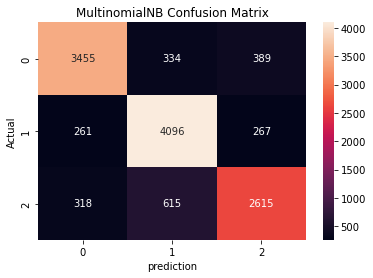

              precision    recall  f1-score   support

          -1       0.85      0.83      0.84     16636
           0       0.82      0.88      0.85     18587
           1       0.81      0.74      0.78     14175

    accuracy                           0.83     49398
   macro avg       0.83      0.82      0.82     49398
weighted avg       0.83      0.83      0.83     49398

              precision    recall  f1-score   support

          -1       0.86      0.83      0.84      4178
           0       0.81      0.89      0.85      4624
           1       0.80      0.74      0.77      3548

    accuracy                           0.82     12350
   macro avg       0.82      0.82      0.82     12350
weighted avg       0.82      0.82      0.82     12350



In [44]:
trained_clf_multinomial_nb = MultinomialNB().fit(x_train, y_train)
get_accuracy('MultinomialNB',trained_clf_multinomial_nb,x_train, y_train, x_test, y_test)

### Linear Svc


Testing accuracy   : 85.4331983805668 %
MSE [TEST]          : 0.34898785425101214
Training accuracy  : 86.0804081136888 %
MSE [TRAIN]         : 0.3340216203085145
precision :  0.854331983805668
recall    :  0.854331983805668
f1_score  :  0.854331983805668


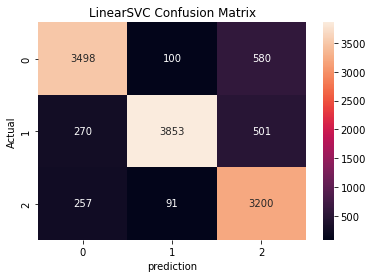

              precision    recall  f1-score   support

          -1       0.87      0.85      0.86     16636
           0       0.96      0.83      0.89     18587
           1       0.76      0.91      0.83     14175

    accuracy                           0.86     49398
   macro avg       0.86      0.86      0.86     49398
weighted avg       0.87      0.86      0.86     49398

              precision    recall  f1-score   support

          -1       0.87      0.84      0.85      4178
           0       0.95      0.83      0.89      4624
           1       0.75      0.90      0.82      3548

    accuracy                           0.85     12350
   macro avg       0.86      0.86      0.85     12350
weighted avg       0.87      0.85      0.86     12350



In [46]:
trained_clf_svc = LinearSVC(max_iter=2000).fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)

### LogisticRegression

Testing accuracy   : 85.417004048583 %
MSE [TEST]          : 0.34234817813765184
Training accuracy  : 86.24843111057127 %
MSE [TRAIN]         : 0.3276043564516782
precision :  0.85417004048583
recall    :  0.85417004048583
f1_score  :  0.85417004048583


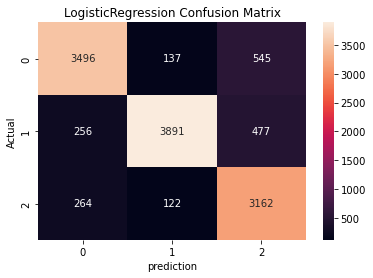

              precision    recall  f1-score   support

          -1       0.87      0.85      0.86     16636
           0       0.96      0.84      0.90     18587
           1       0.76      0.90      0.83     14175

    accuracy                           0.86     49398
   macro avg       0.86      0.87      0.86     49398
weighted avg       0.87      0.86      0.86     49398

              precision    recall  f1-score   support

          -1       0.87      0.84      0.85      4178
           0       0.94      0.84      0.89      4624
           1       0.76      0.89      0.82      3548

    accuracy                           0.85     12350
   macro avg       0.85      0.86      0.85     12350
weighted avg       0.86      0.85      0.86     12350



In [50]:
trained_clf_LogisticRegression = LogisticRegression(max_iter=200).fit(x_train, y_train)
get_accuracy('LogisticRegression',trained_clf_LogisticRegression,x_train, y_train, x_test, y_test)

In [72]:
pickle.dump(trained_clf_LogisticRegression, open("custom_trained_model.sav", "wb"))

### Gradient Boost


In [ ]:
trained_clf_GradientBoost=GradientBoostingClassifier()
trained_clf_GradientBoost.fit(x_train,y_train)
get_accuracy('gboost',trained_clf_GradientBoost,x_train, y_train, x_test, y_test)

### lstm Model

In [ ]:
lstmModel = Sequential(
    [
     Embedding(1000, 100, input_length=1000),
     SpatialDropout1D(0.4),
     LSTM(50, dropout=0.3, recurrent_dropout=0.3),
     Dense(3,activation='softmax')
    ]
)
lstmModel.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
lstmModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1000, 100)         100000    
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 1000, 100)        0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 130,353
Trainable params: 130,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstmModel.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=3)

Epoch 1/3
501/501 [==============================] - 1039s 2s/step - loss: 0.8262 - accuracy: 0.5970 - val_loss: 0.8333 - val_accuracy: 0.5908
Epoch 2/3
501/501 [==============================] - 1088s 2s/step - loss: 0.8197 - accuracy: 0.5990 - val_loss: 0.8329 - val_accuracy: 0.5908
Epoch 3/3
501/501 [==============================] - 1038s 2s/step - loss: 0.8194 - accuracy: 0.5990 - val_loss: 0.8340 - val_accuracy: 0.5908


### Dense Model

In [55]:
X_neuro = X
y_neuro = pd.get_dummies(Y)

In [56]:
x_train_neuro,x_test_neuro,y_train_neuro,y_test_neuro =  train_test_split(X_neuro,y_neuro,random_state=42,test_size=0.20,shuffle=True)

In [59]:
DenseModel = Sequential(
    [
     Dense(1000, activation = 'relu',input_dim=1000),
     Dense(5, activation = 'relu'),
     Dense(6, activation = 'relu'),
     Dense(3,activation='softmax')
    ]
)
DenseModel.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
DenseModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 5)                 5005      
                                                                 
 dense_6 (Dense)             (None, 6)                 36        
                                                                 
 dense_7 (Dense)             (None, 3)                 21        
                                                                 
Total params: 1,006,062
Trainable params: 1,006,062
Non-trainable params: 0
_________________________________________________________________


In [60]:
DenseModel.fit(x_train_neuro, y_train_neuro, validation_data=(x_test_neuro, y_test_neuro), batch_size=128, epochs=5)

Epoch 1/5
386/386 [==============================] - 5s 11ms/step - loss: 0.5631 - accuracy: 0.7915 - val_loss: 0.3715 - val_accuracy: 0.8575
Epoch 2/5
386/386 [==============================] - 4s 11ms/step - loss: 0.3434 - accuracy: 0.8651 - val_loss: 0.3721 - val_accuracy: 0.8560
Epoch 3/5
386/386 [==============================] - 4s 11ms/step - loss: 0.3073 - accuracy: 0.8799 - val_loss: 0.3691 - val_accuracy: 0.8595
Epoch 4/5
386/386 [==============================] - 5s 12ms/step - loss: 0.2702 - accuracy: 0.8955 - val_loss: 0.3862 - val_accuracy: 0.8564
Epoch 5/5
386/386 [==============================] - 4s 11ms/step - loss: 0.2332 - accuracy: 0.9094 - val_loss: 0.4193 - val_accuracy: 0.8565


In [61]:
DenseModel.evaluate(x_test_neuro, y_test_neuro)

386/386 [==============================] - 1s 4ms/step - loss: 0.4193 - accuracy: 0.8565


[0.41928717494010925, 0.8565182089805603]

In [62]:
DenseModel.save('Dense_Model.h5')

In [ ]:
y_hat = DenseModel.predict(x_test_neuro)

In [ ]:
y_test_new = np.array(y_test_neuro).reshape(-1,1)

In [ ]:
y_pred =np.array(K.variable(np_utils.to_categorical(K.argmax(y_hat), num_classes=3)))

In [ ]:
y_pred_new = y_pred.reshape(-1,1)

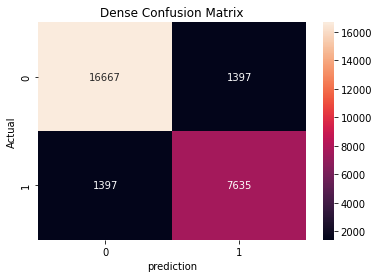

In [ ]:
DenseCM = confusion_matrix(y_test_new,y_pred_new)
sns.heatmap(DenseCM,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("Dense"+ ' Confusion Matrix')
plt.show()

In [ ]:
x={
    -1: 345,
    0: 424,
    1: 23213
}

In [ ]:
x[-1]

345